# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [2]:
#1.1
import pandas as pd
import numpy as np

df_airbnb = pd.read_csv('airbnb_NYC.csv', encoding='latin1')
df_airbnb['Price_clean'] = (
    df_airbnb['Price']
    .str.replace(r'[$,]', '', regex=True)
    .astype(float)
)
missing_count = df_airbnb['Price_clean'].isna().sum()
print(f"Number of missing values in Price: {missing_count}")

Number of missing values in Price: 0


In [3]:
#1.2
df_mn = pd.read_csv('mn_police_use_of_force.csv')

df_mn['subject_injury_clean'] = df_mn['subject_injury'].str.strip().str.capitalize()

missing_prop = df_mn['subject_injury_clean'].isna().mean()
print(f"Proportion of missing values in subject_injury: {missing_prop:.2%}")

ctab = pd.crosstab(df_mn['subject_injury_clean'].fillna('Missing'), 
                   df_mn['force_type'], 
                   dropna=False)
print("\nCross-tabulation (subject_injury vs force_type):")
print(ctab)

df_mn['subject_injury_clean'] = df_mn['subject_injury_clean'].fillna('Missing')

Proportion of missing values in subject_injury: 76.19%

Cross-tabulation (subject_injury vs force_type):
force_type            Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_clean                                                    
Missing                   2          7051               1421        0   
No                        0          1093                131        2   
Yes                       2          1286                 41        0   

force_type            Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_clean                                                      
Missing                              27                 74           87   
No                                   33                 34            0   
Yes                                  44                 40            0   

force_type            Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury_clean                                                        

In [4]:
#1.3
df_metabric = pd.read_csv('metabric.csv')

df_metabric['Survival_Status_Dummy'] = (df_metabric['Overall Survival Status'] == 'Living').astype(int)

print(df_metabric[['Overall Survival Status', 'Survival_Status_Dummy']].head())

  Overall Survival Status  Survival_Status_Dummy
0                0:LIVING                      0
1              1:DECEASED                      0
2                0:LIVING                      0
3              1:DECEASED                      0
4              1:DECEASED                      0


In [5]:
#1.4
missing_reviews = df_airbnb['Review Scores Rating'].isna().sum()
print(f"Number of missing values in Review Scores Rating: {missing_reviews}")

median_rating = df_airbnb['Review Scores Rating'].median()
df_airbnb['Review_Scores_Rating_Imputed'] = df_airbnb['Review Scores Rating'].fillna(median_rating)

print(f"Median rating used for imputation: {median_rating}")

Number of missing values in Review Scores Rating: 8323
Median rating used for imputation: 94.0


1.4 
If people with low scores are more likely to hide them, then the calculated median will be based only on the high scores. Using these high scores to replace the low scores listings will bias your results upward.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [6]:
#2.1
import pandas as pd

df_sharks = pd.read_excel('GSAF5.xls')
print(df_sharks.head())

           Date    Year        Type    Country     State  \
0  29th January  2026.0  Unprovoked     Brazil    Recife   
1  29th January  2026.0  Unprovoked  Australia       NSW   
2  24th January  2026.0  Unprovoked  Australia  Tasmania   
3  20th January  2026.0  Unprovoked  Australia       NSW   
4  19th January  2026.0  Unprovoked  Australia       NSW   

                                Location  Activity                  Name Sex  \
0             Del Chifre Beach in Olinda  Swimming  Deivson Rocha Dantas   M   
1              Angels Beach East Ballina   Surfing           Unnamed man   M   
2             Cooee Beach west of Burnie  Swimming          Megan Stokes   F   
3  Point Plomber North of Port Macquarie   Surfing        Paul Zvirdinas   M   
4                                Dee Why   Surfing               Unknown   M   

  Age  ...                                         Species   \
0  13  ...  Unknown bull and tiger sharks frequent the area   
1   ?  ...                      

In [7]:
#2.2
df_sharks = df_sharks.dropna(axis=1, how='all')

print(f"Columns remaining: {df_sharks.columns.tolist()}")

Columns remaining: ['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ', 'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22']


2.3 
An observation is a single incident that has been recorded in this dataset

In [8]:
#2.4
df_sharks['Year'] = pd.to_numeric(df_sharks['Year'], errors='coerce')

df_recent = df_sharks[df_sharks['Year'] >= 1940].copy()

year_counts = df_recent['Year'].value_counts().sort_index()
print("Number of shark attacks per year since 1940:")
print(year_counts)

Number of shark attacks per year since 1940:
Year
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
         ... 
2022.0     98
2023.0    109
2024.0     52
2025.0     66
2026.0     12
Name: count, Length: 87, dtype: int64


2.4 
Based on the data above, it is suggesting that shark attacks are increasing over the years.

<Axes: >

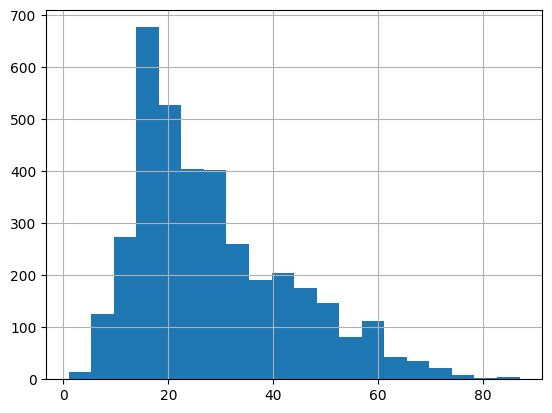

In [9]:
#2.5
import re

def clean_age(age):
    age = str(age).lower()
    match = re.search(r'\d+', age)
    if match:
        return int(match.group())
    return None

df_recent['Age_clean'] = df_recent['Age'].apply(clean_age)

df_recent['Age_clean'].dropna().hist(bins=20)

In [10]:
#2.6
def simplify_type(t):
    t = str(t).strip().capitalize()
    if t in ['Unprovoked']:
        return 'Unprovoked'
    elif t in ['Provoked']:
        return 'Provoked'
    else:
        return 'Unknown'

df_recent['Type_clean'] = df_recent['Type'].apply(simplify_type)

prop_unprovoked = (df_recent['Type_clean'] == 'Unprovoked').mean()
print(f"Proportion Unprovoked: {prop_unprovoked:.2%}")

Proportion Unprovoked: 74.50%


In [11]:
#2.7
def clean_fatal(val):
    val = str(val).strip().upper()
    if val == 'Y': return 'Y'
    if val == 'N': return 'N'
    return 'Unknown'

df_recent['Fatal_clean'] = df_recent['Fatal Y/N'].apply(clean_fatal)
fatal_counts = df_recent['Fatal_clean'].value_counts()
print("Fatal attack counts:")
print(fatal_counts)

Fatal attack counts:
Fatal_clean
N          4246
Y           830
Unknown     462
Name: count, dtype: int64


In [12]:
#2.8
fatality_rate = pd.crosstab(df_recent['Type_clean'], df_recent['Fatal_clean'], normalize='index')
print(fatality_rate)

Fatal_clean         N   Unknown         Y
Type_clean                               
Provoked     0.957935  0.017208  0.024857
Unknown      0.411699  0.449944  0.138358
Unprovoked   0.818953  0.012845  0.168202


2.8
Unprovoked attacks have a higher fatalality rate than provoked ones. This makes sense because unprovoked is usually when a shark mistakes the identity of people for prey. When it's provoked, the shark is just trying to scare or hurt the person.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

3.1 - The paper is about data tidying, which is a type of data cleaning. It makes data analysis tools simple and easy to use.
3.2 - The tidy data standard is used to control initial exploration and analysis of data.
3.3 - This means that even thought tidy data always follows the same form, there are infinite ways a dataset can be unorganzied or messy.
3.4 - Value: A collections of numbers or strings. Every value beliongs to one variable and observation.
    Variable: A collection of all the values that measure the same attribute across all units.
    Observation: A collection of all values measured on the same unit across every attribute.
3.5 - Tidy data is defined with 3 attributes. Each variable forms a column, each observation forms a row. Each type of observational unit forms a table. 
3.6 - 1. Column headers are values, not variable names.
    2. Multiple variables are stored in one column.
    3. Variables are stored in both rows and columns.
    4. Multiple types of observational units are stored in the same table.
    5. A single observational unit is stored in multiple tables.
Table 4 is messy because the column headers are values instead of variables.
Melting is turning columns into rows which changes wide data sets into long ones.
3.7 - Table 11 is messy because the variables are in both columns and rows. Table 12 is tidy because it has been ,olten to move days into a single variable and then move temps to their own columns.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [13]:
#4.1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_gifts = pd.read_csv('ForeignGifts_edu.csv')

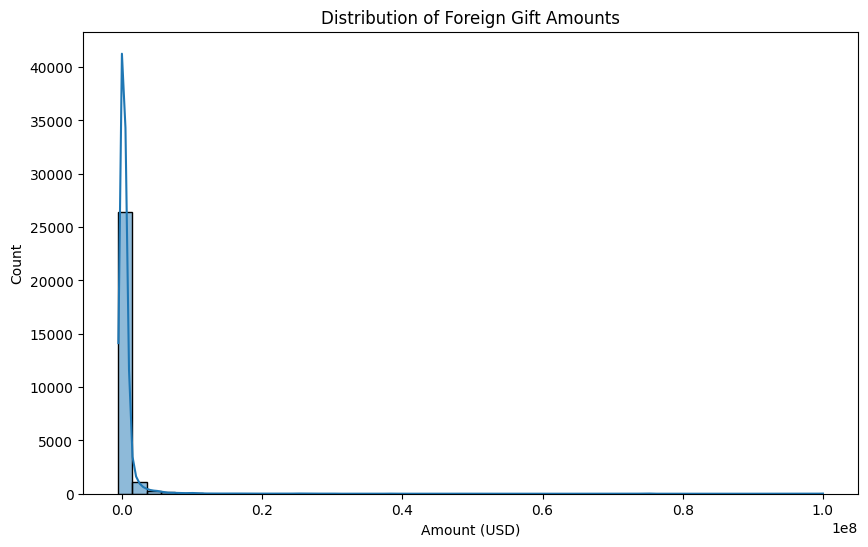

--- Q4.2: Description of Foreign Gift Amount ---
count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Amount_clean, dtype: float64


In [14]:
#4.2
df_gifts['Amount_clean'] = (
    df_gifts['Foreign Gift Amount']
    .replace(r'[\$,]', '', regex=True)
    .astype(float)
)

plt.figure(figsize=(10, 6))
sns.histplot(df_gifts['Amount_clean'], bins=50, kde=True)
plt.title('Distribution of Foreign Gift Amounts')
plt.xlabel('Amount (USD)')
plt.show()

print("--- Q4.2: Description of Foreign Gift Amount ---")
print(df_gifts['Amount_clean'].describe())


--- Q4.3: Gift Type Proportions ---
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


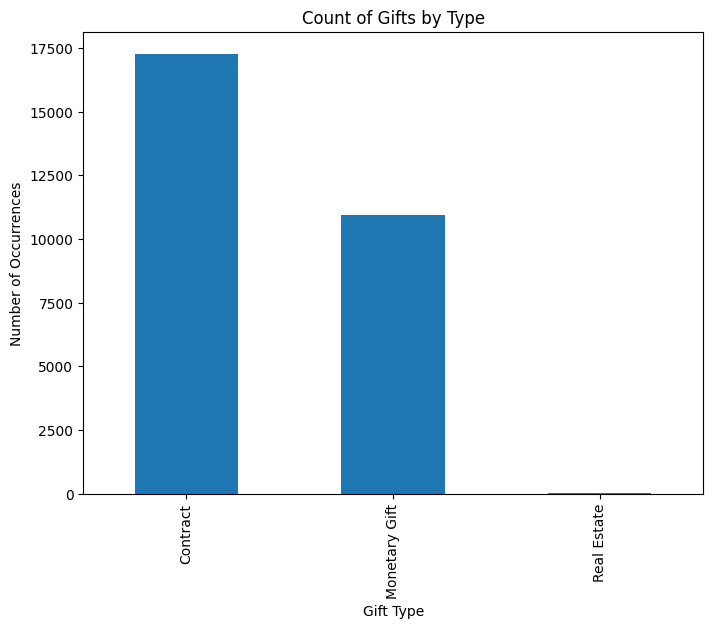

In [15]:
#4.3
gift_counts = df_gifts['Gift Type'].value_counts()
gift_proportions = df_gifts['Gift Type'].value_counts(normalize=True)

print("\n--- Q4.3: Gift Type Proportions ---")
print(gift_proportions)

plt.figure(figsize=(8, 6))
gift_counts.plot(kind='bar')
plt.title('Count of Gifts by Type')
plt.ylabel('Number of Occurrences')
plt.show()

In [19]:
#4.4
top_countries_count = df_gifts['Country of Giftor'].value_counts().head(15)

top_countries_amount = df_gifts.groupby('Country of Giftor')['Amount_clean'].sum().sort_values(ascending=False).head(15)

print("\n--- Q4.4: Top 15 Countries (by Number of Gifts) ---")
print(top_countries_count)
print("\n--- Q4.4: Top 15 Countries (by Total Amount) ---")
print(top_countries_amount)


--- Q4.4: Top 15 Countries (by Number of Gifts) ---
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

--- Q4.4: Top 15 Countries (by Total Amount) ---
Country of Giftor
QATAR                   2.706241e+09
ENGLAND                 1.464907e+09
CHINA                   1.237952e+09
SAUDI ARABIA            1.065206e+09
BERMUDA                 8.995940e+08
CANADA                  8.981607e+08
HONG KONG               8.874025e+08
JAPAN                   6.559548e+08
SWITZERLAND             6.198994e+08
INDIA                   5.395565e+08
GERMANY                 4.424756e+08
UNITED ARAB EMIRATES    4.313964e+08
FRANCE                  4.05839


--- Q4.5: Top 15 Institutions (by Total Amount Received) ---
Institution Name
Carnegie Mellon University                       1.477923e+09
Cornell University                               1.289938e+09
Harvard University                               9.548036e+08
Massachusetts Institute of Technology            8.590717e+08
Yale University                                  6.134413e+08
Texas A&M University                             5.214550e+08
Johns Hopkins University                         5.024096e+08
Northwestern University                          4.023162e+08
Georgetown University                            3.799505e+08
University of Chicago (The)                      3.645443e+08
University of Colorado Boulder                   3.601732e+08
Duke University                                  3.436995e+08
Brigham Young University                         3.235099e+08
Stanford University                              3.195614e+08
University of Texas MD Anderson Cancer Center    3.01

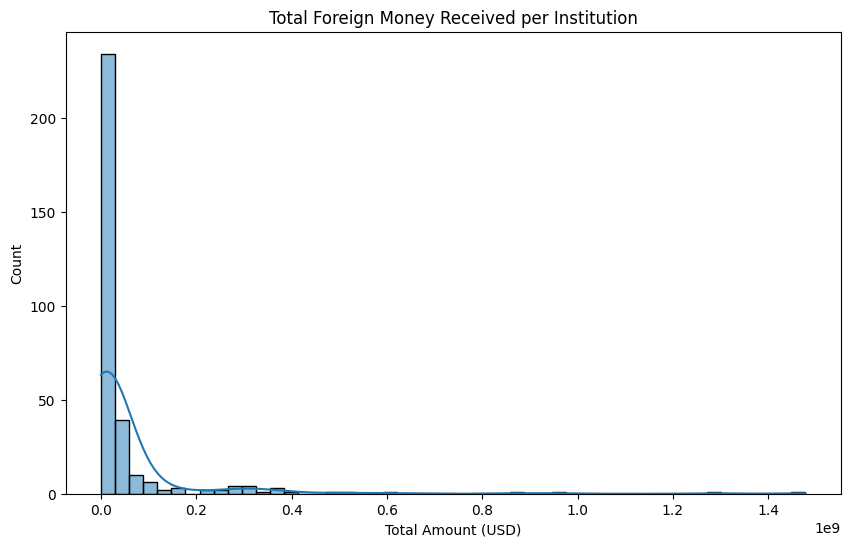

In [20]:
#4.5
top_institutions = df_gifts.groupby('Institution Name')['Amount_clean'].sum().sort_values(ascending=False).head(15)

print("\n--- Q4.5: Top 15 Institutions (by Total Amount Received) ---")
print(top_institutions)

inst_totals = df_gifts.groupby('Institution Name')['Amount_clean'].sum()
plt.figure(figsize=(10, 6))
sns.histplot(inst_totals, bins=50, kde=True)
plt.title('Total Foreign Money Received per Institution')
plt.xlabel('Total Amount (USD)')
plt.show()

In [21]:
#4.6
top_giftors = df_gifts.groupby('Giftor Name')['Amount_clean'].sum().sort_values(ascending=False).head(10)

print("\n--- Q4.6: Top 10 Giftors by Total Funding ---")
print(top_giftors)


--- Q4.6: Top 10 Giftors by Total Funding ---
Giftor Name
Qatar Foundation                       1.166504e+09
Qatar Foundation/Qatar National Res    7.961970e+08
Qatar Foundation for Education         3.739452e+08
Anonymous                              3.387936e+08
Saudi Arabian Cultural Mission         2.752215e+08
HCL                                    1.900000e+08
Church of Jesus Christ of LDS          1.852037e+08
Emirates Institute for Advanced Sc     1.706412e+08
QIC                                    1.483555e+08
Anonymous #9                           9.633500e+07
Name: Amount_clean, dtype: float64


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [22]:
#5.1
df_college = pd.read_csv('college_completion.csv')

In [23]:
#5.2
print(f"Observations: {df_college.shape[0]}")
print(f"Variables: {df_college.shape[1]}")
print("\nFirst 5 rows:")
print(df_college.head())

Observations: 3798
Variables: 63

First 5 rows:
   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges

In [24]:
#5.3
ctab_control_level = pd.crosstab(df_college['control'], df_college['level'])
print("\n--- Q5.3: Cross-tabulation of Control and Level ---")
print(ctab_control_level)


--- Q5.3: Cross-tabulation of Control and Level ---
level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632



--- Q5.4: Graduation Rate (grad_100_value) Overall ---
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


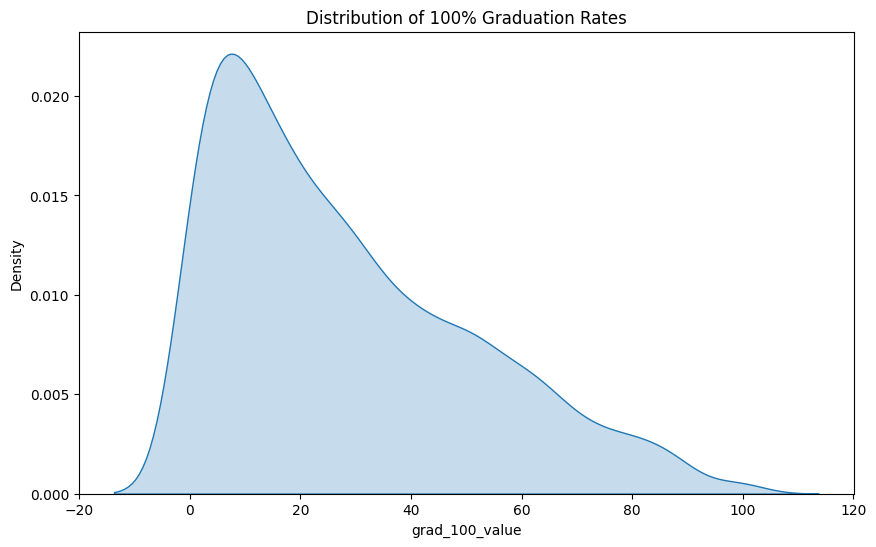


--- Q5.4: Graduation Rates by Institutional Control ---
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


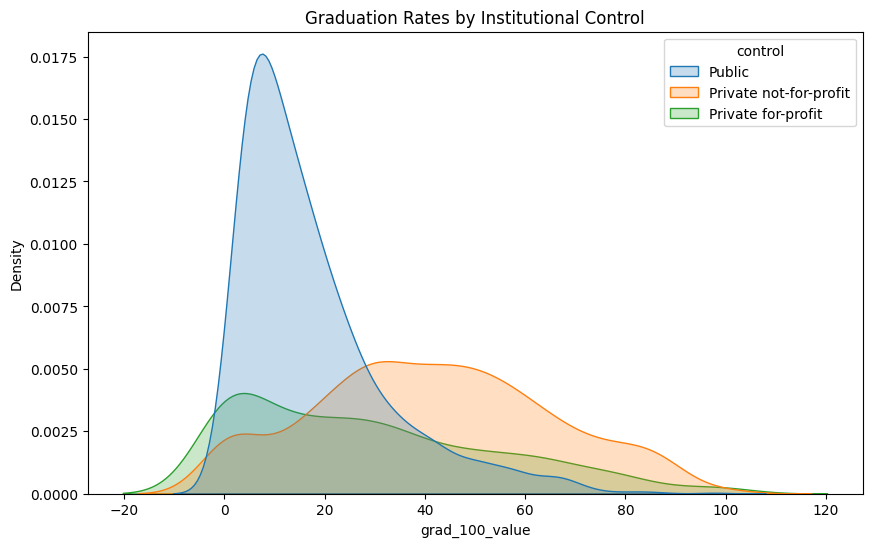

In [25]:
#5.4
print("\n--- Q5.4: Graduation Rate (grad_100_value) Overall ---")
print(df_college['grad_100_value'].describe())

plt.figure(figsize=(10, 6))
sns.kdeplot(df_college['grad_100_value'], fill=True)
plt.title('Distribution of 100% Graduation Rates')
plt.show()

print("\n--- Q5.4: Graduation Rates by Institutional Control ---")
print(df_college.groupby('control')['grad_100_value'].describe())

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_college, x='grad_100_value', hue='control', fill=True)
plt.title('Graduation Rates by Institutional Control')
plt.show()

5.4 - Private non profits have the best graduation rates. 


Overall Covariance: 88610.48
Overall Correlation: 0.58


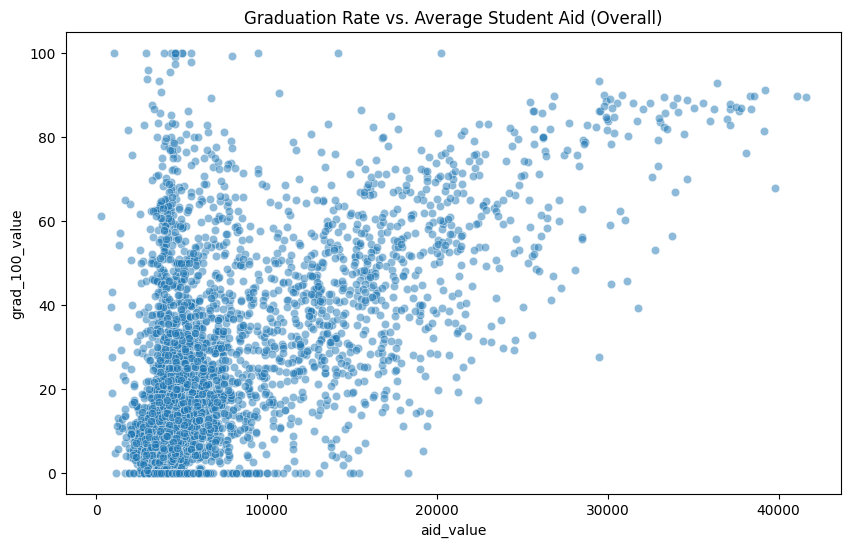

Correlation for Public: 0.48
Correlation for Private not-for-profit: 0.60
Correlation for Private for-profit: 0.19


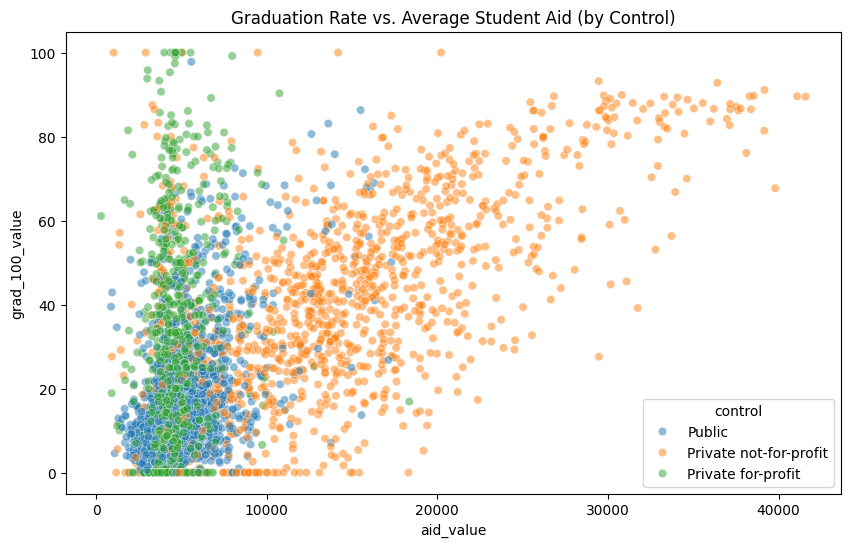

In [26]:
#5.5
cov_overall = df_college[['grad_100_value', 'aid_value']].cov().iloc[0, 1]
corr_overall = df_college[['grad_100_value', 'aid_value']].corr().iloc[0, 1]
print(f"\nOverall Covariance: {cov_overall:.2f}")
print(f"Overall Correlation: {corr_overall:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_college, x='aid_value', y='grad_100_value', alpha=0.5)
plt.title('Graduation Rate vs. Average Student Aid (Overall)')
plt.show()

for ctrl in df_college['control'].unique():
    subset = df_college[df_college['control'] == ctrl]
    corr = subset[['grad_100_value', 'aid_value']].corr().iloc[0, 1]
    print(f"Correlation for {ctrl}: {corr:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_college, x='aid_value', y='grad_100_value', hue='control', alpha=0.5)
plt.title('Graduation Rate vs. Average Student Aid (by Control)')
plt.show()

5.5 - There is a positive correlation between higher average student aid and higher graduation rates.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

Look for image of my answers in github repo.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [27]:
#7.1
df_ames = pd.read_csv('ames_prices.csv')

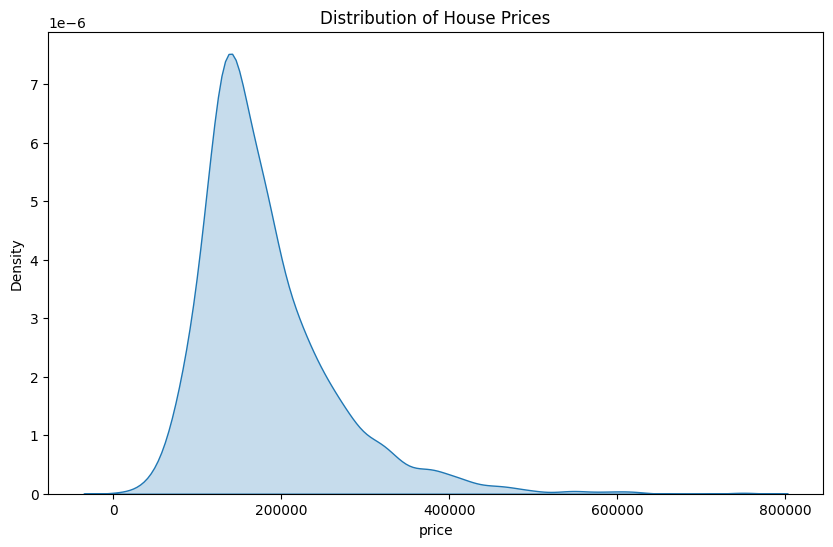

Overall Price Description:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


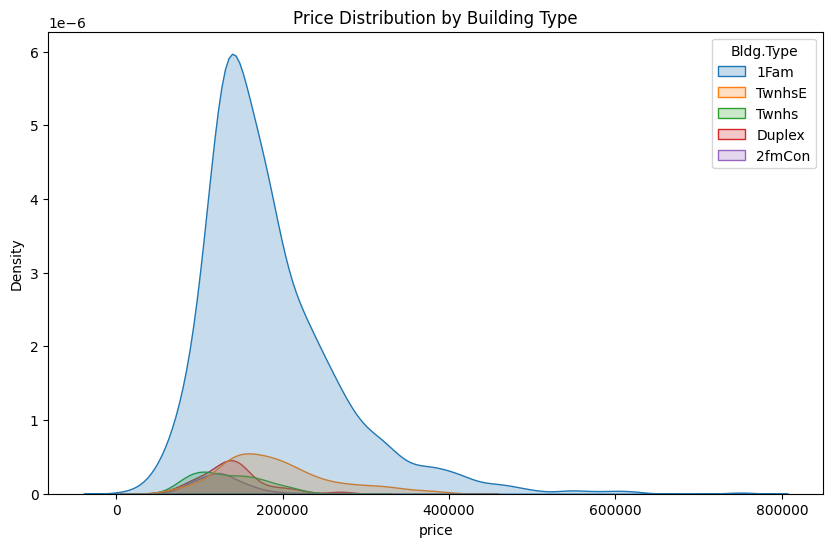


Price Stats by Building Type:
            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


In [28]:
#7.2
plt.figure(figsize=(10, 6))
sns.kdeplot(df_ames['price'], fill=True)
plt.title('Distribution of House Prices')
plt.show()

print("Overall Price Description:")
print(df_ames['price'].describe())

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_ames, x='price', hue='Bldg.Type', fill=True)
plt.title('Price Distribution by Building Type')
plt.show()

print("\nPrice Stats by Building Type:")
print(df_ames.groupby('Bldg.Type')['price'].describe())

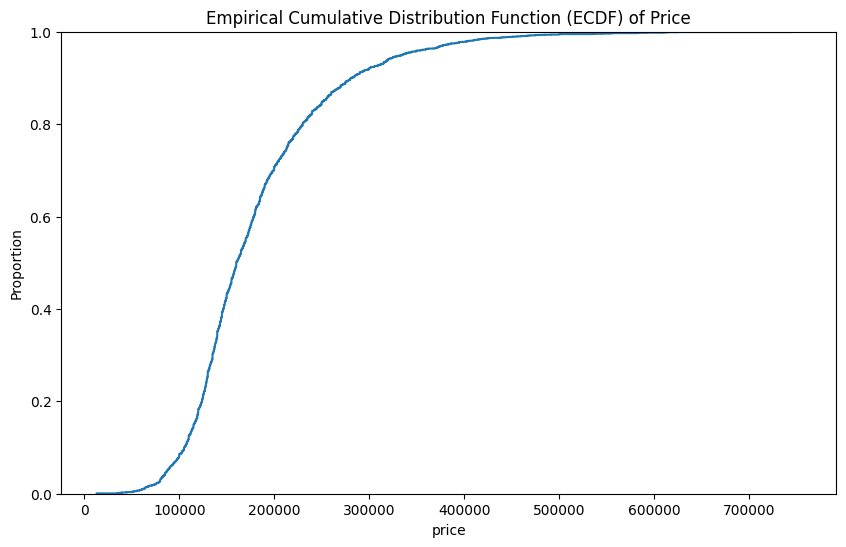


5-Number Summary:
0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64


In [29]:
#7.3
plt.figure(figsize=(10, 6))
sns.ecdfplot(df_ames['price'])
plt.title('Empirical Cumulative Distribution Function (ECDF) of Price')
plt.show()

five_num = df_ames['price'].quantile([0, 0.25, 0.5, 0.75, 1])
print("\n5-Number Summary:")
print(five_num)

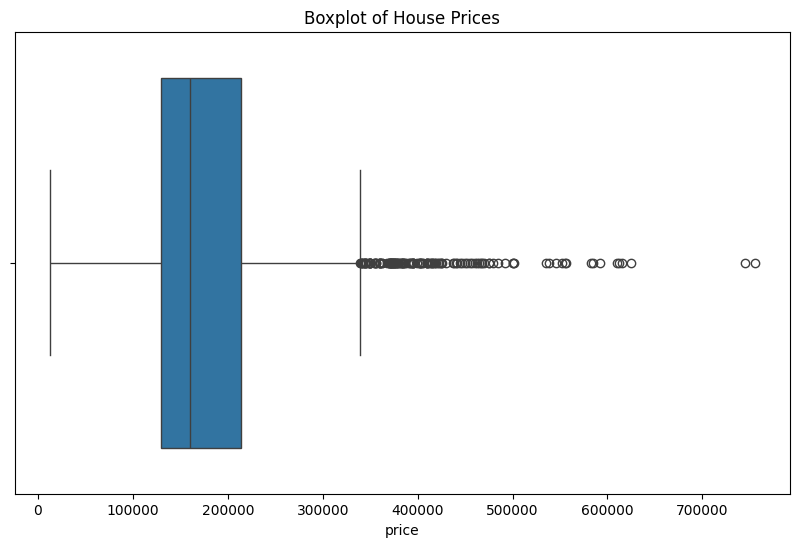

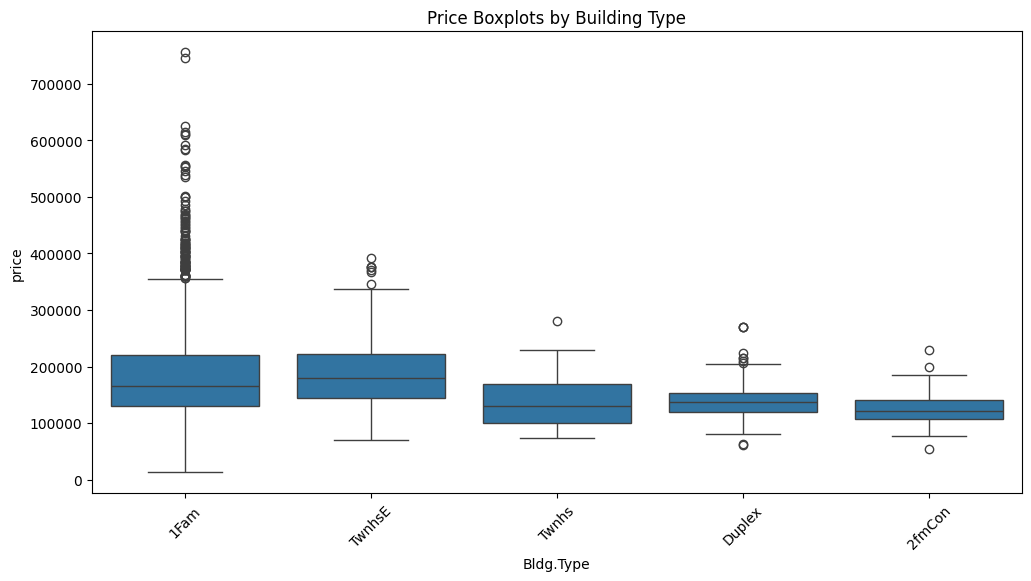

In [30]:
#7.4
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_ames['price'])
plt.title('Boxplot of House Prices')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ames, x='Bldg.Type', y='price')
plt.title('Price Boxplots by Building Type')
plt.xticks(rotation=45)
plt.show()

7.4 - These outliers epresent luxury homes that are significantly more expensive than the typical Ames residence.
Single-family homes show a much wider range and more outliers than duplexes or townhomes.

In [31]:
#7.5
Q1 = df_ames['price'].quantile(0.25)
Q3 = df_ames['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_ames['is_outlier'] = ((df_ames['price'] < lower_bound) | (df_ames['price'] > upper_bound)).astype(int)
print(f"\nNumber of outliers identified: {df_ames['is_outlier'].sum()}")


Number of outliers identified: 137


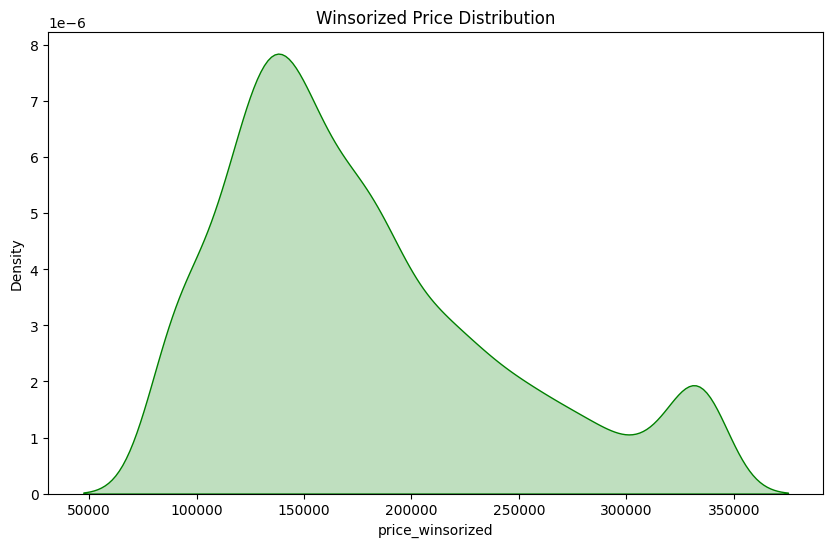


Winsorized Price Description:
count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: price_winsorized, dtype: float64


/usr/local/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4786: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [32]:
#7.6
from scipy.stats import mstats
df_ames['price_winsorized'] = mstats.winsorize(df_ames['price'], limits=[0.05, 0.05])

plt.figure(figsize=(10, 6))
sns.kdeplot(df_ames['price_winsorized'], fill=True, color='green')
plt.title('Winsorized Price Distribution')
plt.show()

print("\nWinsorized Price Description:")
print(df_ames['price_winsorized'].describe())